In [8]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
from matplotlib.ticker import FixedLocator
import os
import numpy as np
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

In [3]:
# Open the file
file_path = 'D:/Projects/fiji-training-2024/data/wrf/'
filename = "wrfout_d02_2024-06-24_00_00_00"

ncfile = Dataset(os.path.join(file_path,filename))
slp = getvar(ncfile,'slp')

In [7]:
# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
lons = np.where(lons < 0, lons + 360, lons) # convert the west longitude value to east

# Get the cartopy mapping object
cart_proj = get_cartopy(slp)

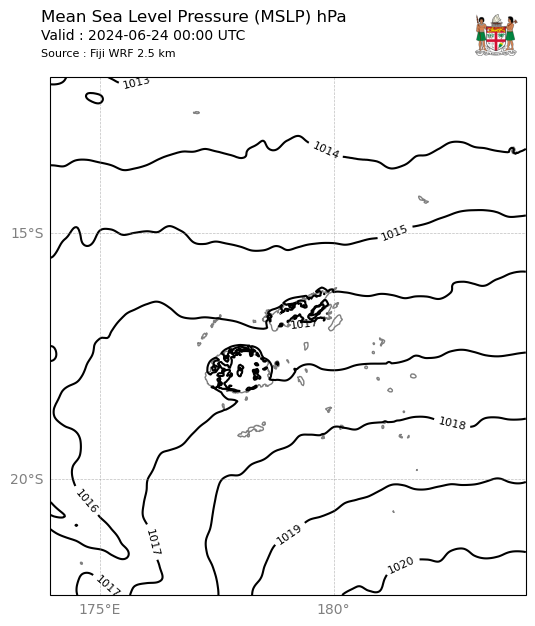

In [9]:
# Initiate figure and axes instance
fig, ax = plt.subplots(1, 1, figsize=(13, 7), subplot_kw={'projection': cart_proj})

levels = range(990,1028,2)
contour = ax.contour(to_np(lons), to_np(lats), to_np(slp), 8, colors="black",
            transform=crs.PlateCarree())

# get axes position
pos = ax.get_position() # get the original position

# Add contour labels
ax.clabel(contour, inline=True, fontsize=8)

# Set the map bounds
ax.set_xlim(cartopy_xlim(slp))
ax.set_ylim(cartopy_ylim(slp))

# Add coastlines and other features
ax.coastlines(color='gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Draw gridlines with labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10, 'color': 'gray'}
gl.ylabel_style = {'size': 10, 'color': 'gray'}

# Set specific values for the gridlines
gl.xlocator = FixedLocator([165, 170, 175, 180, 185, 190, 195, 200, 205])
gl.ylocator = FixedLocator([-35, -30, -25, -20, -15, -10, -5])

# Set title and text info
main_title = 'Mean Sea Level Pressure (MSLP) hPa'
time_text = 'Valid : 2024-06-24 00:00 UTC'
model_text = 'Source : Fiji WRF 2.5 km'

ax.set_title(main_title, x=pos.x0, y=pos.y1 + 0.05, pad=25, fontsize=12,ha="left", transform=fig.transFigure)
ax.text(x=pos.x0, y=pos.y1 + 0.025, s=time_text,transform=fig.transFigure, size=10, ha="left")
ax.text(x=pos.x0, y=pos.y1 + 0.0, s = model_text, transform=fig.transFigure, size=8, ha="left")

# add logo
lgaxes = fig.add_axes([pos.x1 - 0.06, pos.y1 + 0.0, 0.06, 0.06], )  # l,b,w,h
lgaxes.imshow(plt.imread("D:/Projects/fiji-training-2024/data/Coat_of_arms_of_Fiji.png"))
lgaxes.axis("off")

plt.subplots_adjust(top=0.85)